In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
connectivity_min, connectivity_max, connectivity_step = 0.1,5,0.25
connectivity_span = np.arange(connectivity_min,connectivity_max,connectivity_step)
total_time = 1000
observing_ensembles = ['1000']

In [6]:
sync_param_dict = {}
sigma_dict = {}

for num_neurons in observing_ensembles:
    sample_path = os.path.join('ensembles','N{}_T{}_g_{}_{}_{}'.format(num_neurons,total_time,connectivity_min,connectivity_max, connectivity_step))
    sync_param_dict[num_neurons] = np.load( os.path.join(sample_path,'sync_param_records.npy') ) 
    sigma_dict[num_neurons] = np.load( os.path.join(sample_path,'sigma_records.npy') ) 

In [ ]:
neurons_num_string = '_'.join(observing_ensembles)
path = os.path.join('ensembles',neurons_num_string)
try:
    os.makedirs(path)
except:
    pass

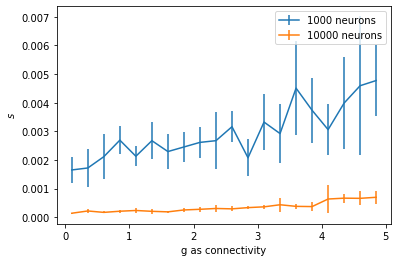

In [22]:
fig = plt.figure()
ax = fig.subplots()
# ax.errorbar(x = connectivity_span, y = np.mean(hundred,axis = 1),yerr = np.var(hundred,axis = 1))
for x in observing_ensembles:
    ax.errorbar(x = connectivity_span, y = np.mean(sync_param_dict[x],axis = 1),
                yerr = np.var(sync_param_dict[x],axis = 1)**(0.5),label = x + ' neurons')

plt.legend()
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$s$')
fig.savefig(os.path.join(path,'pops_sync_param.png'))

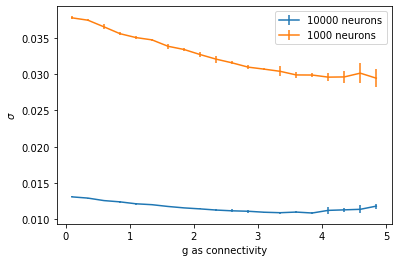

In [5]:
fig = plt.figure()
ax = fig.subplots()
# ax.errorbar(x = connectivity_span, y = np.mean(hundred,axis = 1),yerr = np.var(hundred,axis = 1))
for x in observing_ensembles:
    ax.errorbar(x = connectivity_span, y = np.mean(sigma_dict[x],axis = 1),
                yerr = np.var(sigma_dict[x],axis = 1)**(0.5),label = x + ' neurons')

plt.legend()
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$\sigma$')
fig.savefig(os.path.join(path,'pops_sigma.png') )